<a href="https://colab.research.google.com/github/alx1056/Logistic-Diabetes/blob/main/logisticRegDiabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mn
import random
import statistics
from sklearn import metrics
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/diabetes2.csv")
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


[Text(0.5, 0, 'Pregnancies'),
 Text(1.5, 0, 'Glucose'),
 Text(2.5, 0, 'BloodPressure'),
 Text(3.5, 0, 'SkinThickness'),
 Text(4.5, 0, 'Insulin'),
 Text(5.5, 0, 'BMI'),
 Text(6.5, 0, 'DiabetesPedigreeFunction'),
 Text(7.5, 0, 'Age'),
 Text(8.5, 0, 'Outcome')]

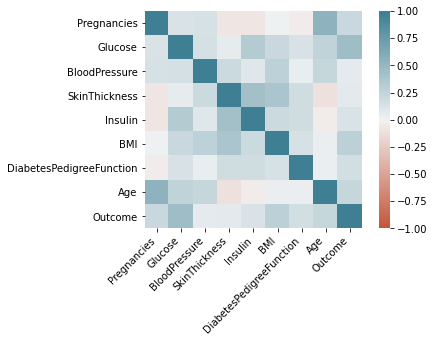

In [ ]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

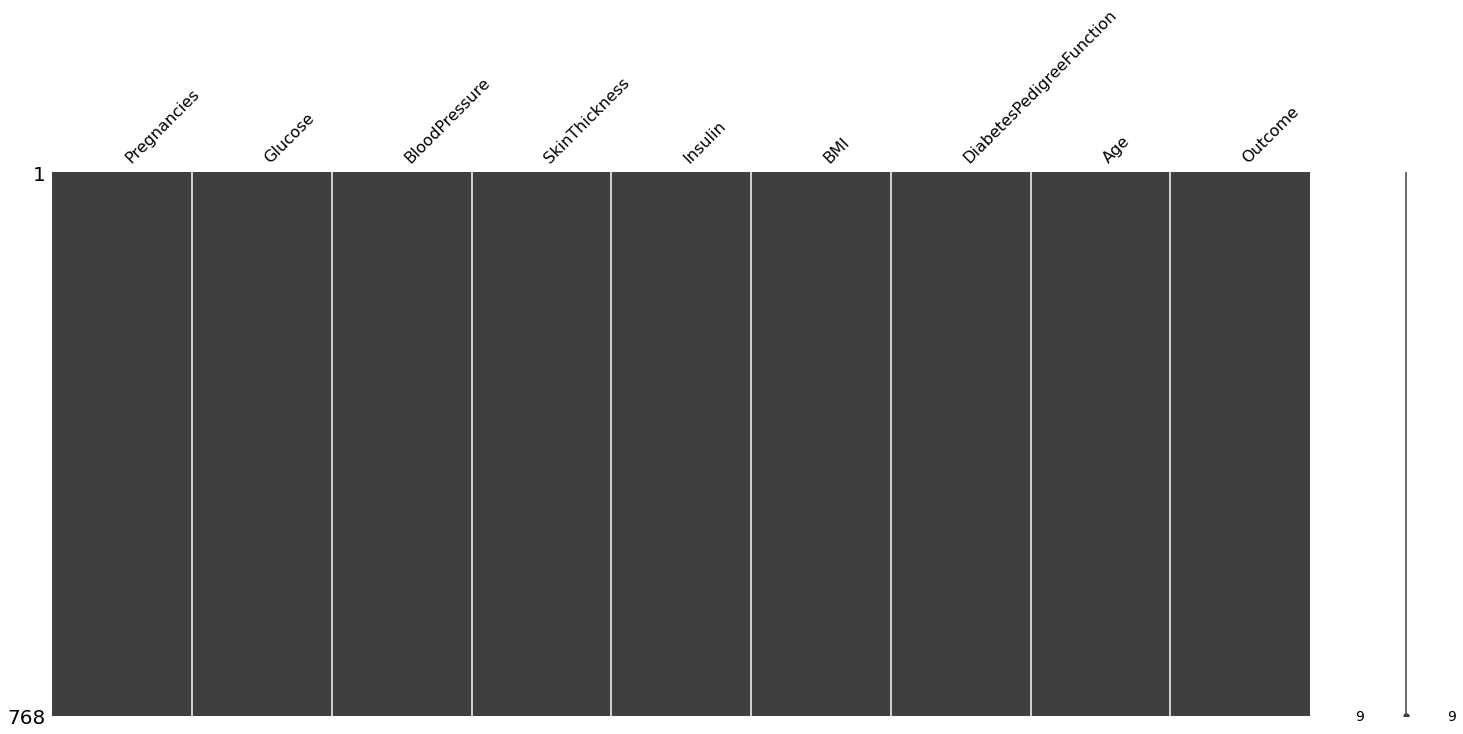

In [ ]:
mn.matrix(data)

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

X = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
print(str(data['Glucose'].max()) + " Is Max Glucose level")
print(str(data['Glucose'].min()) + " Is Min Glucose level")
print("\n")
print(str(data['BloodPressure'].max()) + " Is Max BP level")
print(str(data['BloodPressure'].min()) + " Is Min BP level")
print("\n")
print(str(data['SkinThickness'].max()) + " Is Max Skin Thickness level")
print(str(data['SkinThickness'].min()) + " Is Min Skin Thickness level")
print("\n")
print(str(data['Insulin'].max()) + " Is Max Insulin level")
print(str(data['Insulin'].min()) + " Is Min Insulin level")
print("\n")
print(str(data['BMI'].max()) + " Is Max BMI level")
print(str(data['BMI'].min()) + " Is Min BMI level")
print("\n")
print(str(data['DiabetesPedigreeFunction'].max()) + " Is Max Diabetes Pedigree Function level")
print(str(data['DiabetesPedigreeFunction'].min()) + " Is Min Diabetes Pedigree Function level")
print("\n")
print(str(data['Age'].max()) + " Is Max Age")
print(str(data['Age'].min()) + " Is Min Age")

199 Is Max Glucose level
0 Is Min Glucose level


122 Is Max BP level
0 Is Min BP level


99 Is Max Skin Thickness level
0 Is Min Skin Thickness level


846 Is Max Insulin level
0 Is Min Insulin level


67.1 Is Max BMI level
0.0 Is Min BMI level


2.42 Is Max Diabetes Pedigree Function level
0.078 Is Min Diabetes Pedigree Function level


81 Is Max Age
21 Is Min Age


In [ ]:
def pred():
  Glucose = float(input("Please enter Glucose level (0-200): "))
  BP = float(input("Please enter BP level (0-150): "))
  SkinThick = float(input("Please enter Skin Thickness level (0-100): "))
  Insulin = float(input("Please enter Insulin level (0-900): "))
  BMI = float(input("Please enter BP level (0-70): "))
  DPF = float(input("Please enter Skin Thickness level (0-3.00): "))
  Age = float(input("Please enter Age (0-90): "))

  p = [[Glucose, BP, SkinThick, Insulin, BMI, DPF, Age]]

  value = logmodel.predict(p)
  if value == [[0]]: 
    print("Not Likely Diabetic")
  else:
    print("Likely Diabetic")

In [ ]:
#will allow users to enter their own data to see if they are diabetic based on the model
pred()

Please enter Glucose level (0-200): 200
Please enter BP level (0-150): 100
Please enter Skin Thickness level (0-100): 100
Please enter Insulin level (0-900): 00
Please enter BP level (0-70): 40
Please enter Skin Thickness level (0-3.00): 2
Please enter Age (0-90): 40
Likely Diabetic


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       154
           1       0.74      0.66      0.70        77

    accuracy                           0.81       231
   macro avg       0.79      0.77      0.78       231
weighted avg       0.81      0.81      0.81       231



In [122]:
logmodel.fit(X_train, y_train)
print ("Accuracy on training set:")
print (logmodel.score(X_train, y_train))
print ("Accuracy on testing set:")
print (logmodel.score(X_test, y_test))
print("\n")
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Accuracy on training set:
0.750465549348231
Accuracy on testing set:
0.8095238095238095


MAE: 0.19047619047619047
MSE: 0.19047619047619047
RMSE: 0.4364357804719847
